## 1.BUSINESS UNDERSTANDING


    1.1.INTRODUCTION

The business problem at hand is the need to provide homeowners with accurate and reliable advice regarding home renovations and their potential impact on the estimated value of their homes. The stakeholder aims to assist homeowners in making informed decisions about renovating their properties, enabling them to maximize their investment returns while improving their living spaces.

To address this problem effectively, the stakeholder must gather relevant data and insights, analyze the factors that influence home value, and develop a comprehensive advisory framework. This framework should consider various renovation projects, their costs, and their potential impact on the estimated value of homes.

The stakeholder needs to establish a thorough understanding of the real estate market, regional trends, and buyer preferences to provide accurate advice. Factors such as location, property size, number of bedrooms and bathrooms, overall condition, and specific features play crucial roles in determining the value of a home. By assessing these factors and their relationship with renovation projects, the stakeholder can guide homeowners toward the most effective improvements.

To achieve this, the stakeholder may need to collaborate with real estate agents, property appraisers, and industry experts who can provide valuable insights into market dynamics and trends. Additionally, data analysis and machine learning techniques can be employed to identify correlations between renovation projects and home value, enabling the stakeholder to offer data-driven recommendations.

The stakeholder should also consider the financial aspect, helping homeowners understand the costs associated with different renovations and estimating the potential increase in the value of their homes. By providing homeowners with a clear understanding of the return on investment (ROI) for various renovation projects, the stakeholder can assist in making informed decisions that align with homeowners' budgetary constraints and goals.


    1.2.PROBLEM STATEMENT
The stakeholder has a critical business issue to solve: how to give homeowners reliable, individualized recommendations about house improvements and how such changes can affect the assessed worth of their properties. Currently, homeowners are unable to rely on trustworthy information about the extent to which and how much a certain restoration project will raise their property value. Due to this knowledge gap, homeowners are unable to make informed judgments regarding their renovation spending, which creates uncertainty and may result in missed opportunities. The idea is to create a solution that makes use of data-driven insights and industry knowledge to provide thorough guidance to homeowners, aiding them to understand the potential value increase associated with various remodeling options and make decisions that are in line with their objectives and financial considerations.

## 2.DATA UNDERSTANDING

    2.1.MAIN OBJECTIVE
To give homeowners specific and reliable information on how and by how much home improvements can raise the projected value of their houses. This goal strives to arm homeowners with the knowledge they need to choose renovation projects that maximize return on investment while raising the value of their homes.


    2.2.SPECIFIC OBJECTIVES
-To assess the influence of various home renovation projects on the projected value of properties.i.e.:renovation impact. This entails examining historical data, market trends, and sector insights to pinpoint the improvements with the most potential to raise the value of real estate. Homeowners can concentrate on the most efficient projects by analyzing the effects of various renovation types, such as kitchen remodels, bathroom upgrades, or energy-efficient enhancements.

-The second goal is to provide homeowners with tailored advice based on their unique property details, location, and remodeling aspirations. The goal is to offer individualized advise that emphasizes the remodeling projects most likely to result in a rise in estimated property worth by taking into account elements including the property's size, condition, and market demand. Homeowners can properly prioritize their remodeling projects and allocate resources thanks to customized recommendations.

-To identify how much the projected value of homes may rise under various remodeling scenarios. The goal is to give homeowners accurate estimates of the anticipated value gain for certain renovation projects by utilizing data analysis, statistical modeling, and historical data.

# 3.DATA PREPARATION

     3.1. IMPORTING LIBRARIES

In [96]:
#loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



    3.2. LOADING THE DATA

In [97]:
#reading the data
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [98]:
#understand the data types
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [99]:
#understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# 4.DATA CLEANING

    4.1.MISSING VALUES

In [100]:
#checking for missing values
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

    4.2.CHECKING FOR DUPLICATES

In [101]:
#checking for duplicates
data.duplicated().any()

False

    4.3.HANDLING MISSING VALUES

We will use mode imputation to fill missing values so as to maintain the overall balance of categories.

In [102]:
#replace specific values in the column with corresponding replacements
data['waterfront'] = data['waterfront'].replace({0.0: 'No', 1.0: 'Yes'})
#computes the count of unique values
value_counts = data['waterfront'].value_counts()
print(value_counts)


NO     19075
YES      146
Name: waterfront, dtype: int64


In [103]:
#mode imputation
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode().iloc[0])
data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [104]:
data['view'] = data['view'].replace({0: 'No',1.0: 'Yes'})
value_counts = data['view'].value_counts()
print(value_counts)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [105]:
data['view'] = data['view'].fillna(data['view'].mode().iloc[0])
data['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [106]:
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_renovated'].mode().iloc[0])
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [107]:
data['yr_renovated'].fillna(0, inplace=True)

In [108]:
#check for null values
pd.DataFrame(data.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [110]:
#convert 'yr_renovated' column to integers
data['yr_renovated'] = data['yr_renovated'].replace({'No': 0}).astype(int)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


In [111]:
median_value = data['sqft_basement'][data['sqft_basement'] != '?'].median()
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', median_value))
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'])


## 5.LABEL ENCODING

Transform categorical variables into numerical labels as this a requirement for most machine learning algorithms

In [112]:

#define the columns with categorical variables
categorical_columns = ['floors','waterfront','view','grade','condition']
#create a LabelEncoder object
label_encoder = LabelEncoder()

#apply label encoding to the categorical columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))



#print the updated dataset
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0,0,4,...,8,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,4,...,8,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0,0,4,...,7,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0,0,4,...,8,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0,0,4,...,9,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,4,0,4,...,9,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,4,...,9,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,4,...,8,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,4,...,9,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


In [113]:

#calculate years since renovation
data['renovation_age'] = data['yr_built'] - data['yr_renovated']
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0,0,4,...,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,4,...,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,-40
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0,0,4,...,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0,0,4,...,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0,0,4,...,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,4,0,4,...,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509,2009
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,4,...,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200,2014
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,4,...,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007,2009
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,4,...,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287,2004


## 6. EXPLORATORY DATA ANALYSIS

In [114]:
#convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
#calculate the time difference between the 'date' and 'yr_built'
data['years_since_sold'] = data['date'].dt.year - data['yr_built']
#check the updated dataset
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_age,years_since_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,0,0,4,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,1955,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2,0,4,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,-40,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,0,0,4,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,1933,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,1965,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,0,0,4,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,4,0,4,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,2009,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2,0,4,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,2014,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2,0,4,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,2009,5
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2,0,4,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,2004,11


In [115]:
#drop the unnecessary columns
data = data.drop(['id','date','long','sqft_living15','sqft_lot15','yr_built','yr_renovated'], axis=1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,221900.0,3,1.00,1180,5650,0,0,4,0,8,1180,0.0,98178,47.5112,1955,59
1,538000.0,3,2.25,2570,7242,2,0,4,0,8,2170,400.0,98125,47.7210,-40,63
2,180000.0,2,1.00,770,10000,0,0,4,0,7,770,0.0,98028,47.7379,1933,82
3,604000.0,4,3.00,1960,5000,0,0,4,4,8,1050,910.0,98136,47.5208,1965,49
4,510000.0,3,2.00,1680,8080,0,0,4,0,9,1680,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,4,0,4,0,9,1530,0.0,98103,47.6993,2009,5
21593,400000.0,4,2.50,2310,5813,2,0,4,0,9,2310,0.0,98146,47.5107,2014,1
21594,402101.0,2,0.75,1020,1350,2,0,4,0,8,1020,0.0,98144,47.5944,2009,5
21595,400000.0,3,2.50,1600,2388,2,0,4,0,9,1600,0.0,98027,47.5345,2004,11


## 7.CORRELATION AND DATA VISUALIZATIONS

Before creating our simple linear regression it is important to provide valuable insights into the relationship between variables and help identify potential predictors for the regression model.We do this through correlation

In [116]:
#check correlation
correlation_matrix = data.corr()
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,renovation_age,years_since_sold
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,-0.304727,0.022246,-0.366458,0.605368,0.321108,-0.053402,0.306692,-0.111340,-0.053890
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,-0.067322,0.010281,-0.061553,0.479386,0.297229,-0.154092,-0.009951,-0.005237,-0.155817
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.147591,-0.154490,-0.170167,0.686668,0.278485,-0.204786,0.024280,-0.006133,-0.507561
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.228444,-0.081177,-0.316768,0.876448,0.428660,-0.199802,0.052155,-0.024904,-0.318592
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.051036,0.000125,-0.090127,0.184139,0.015031,-0.129586,-0.085514,-0.000693,-0.052853
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.013924,-0.287480,-0.047015,0.523989,-0.241866,-0.059541,0.049239,0.035002,-0.489514
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,-0.228500,0.019410,-0.081736,0.071778,0.083050,0.028923,-0.012157,-0.074469,0.024406
view,-0.304727,-0.067322,-0.147591,-0.228444,-0.051036,-0.013924,-0.228500,1.000000,-0.041205,0.100525,-0.130867,-0.224590,-0.080808,-0.012381,0.066056,-0.061064
condition,0.022246,0.010281,-0.154490,-0.081177,0.000125,-0.287480,0.019410,-0.041205,1.000000,0.024222,-0.180801,0.164216,0.010265,-0.019233,0.026616,0.394954
grade,-0.366458,-0.061553,-0.170167,-0.316768,-0.090127,-0.047015,-0.081736,0.100525,0.024222,1.000000,-0.318437,-0.060853,0.032383,-0.029839,-0.005177,0.008881


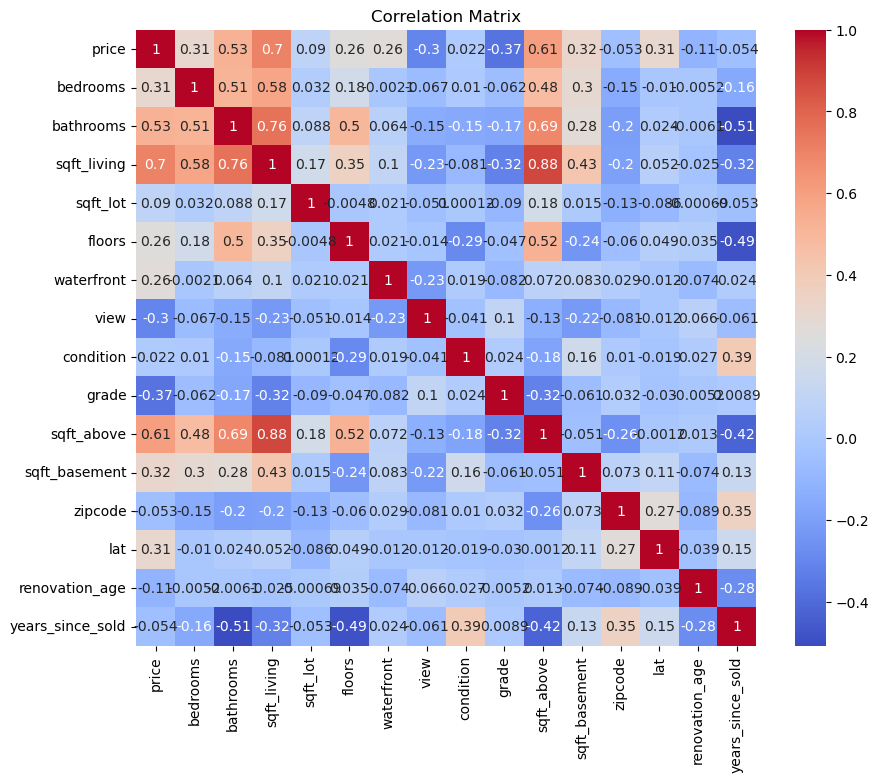

In [117]:

#plot the correlation using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


    INTERPRETATION

The price of the house is positively correlated with the number of bedrooms, bathrooms, square footage of living area and square footage above ground level. This indicates that as these variables increase, the price of the house tends to increase as well.

The price of the house is negatively correlated with the grade of the house.A higher grade is associated with a lower price.

The number of bedrooms and bathrooms are positively correlates, suggesting that houses with more bedroomrs tend to have more bathrooms as well.

The square footage of the living area is strongly correlated with the square footage above the ground level.This is expected since the total livng area includes the area above the ground level.

The years since the house was sold is negatively correlated with the number of bathrooms, indicating that houses sold more recently tend to have fewer bathrooms.

The price of the house is negatively correlated with the latitude and age of renovation.This suggests that houses with higher latitude and more recent renovation tend to have lower prices.



## 8.DATA NORMALIZATION

A preprocessing technique commonly used in machine learning to bring the features or variables of a dataset onto a common scale.


In [118]:

#create a new dataframe with the columns to be scaled
columns_to_scale = ['sqft_living','sqft_lot','floors','sqft_above']
data_to_scale = data[columns_to_scale]
#initialize the MinMaxScaler object
scaler = MinMaxScaler()
#fit and transfrom the data using the scaler
scaled_data = scaler.fit_transform(data_to_scale)
#create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
#merge the scaled data with the remaining columns from the original data
data_scaled = pd.concat([scaled_df,data.drop(columns=columns_to_scale)], axis=1) 
#display the sacled data
data_scaled



,sqft_living,sqft_lot,floors,sqft_above,price,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,0.061503,0.003108,0.0,0.089602,221900.0,3,1.00,0,4,0,8,0.0,98178,47.5112,1955,59
1,0.167046,0.004072,0.4,0.199115,538000.0,3,2.25,0,4,0,8,400.0,98125,47.7210,-40,63
2,0.030372,0.005743,0.0,0.044248,180000.0,2,1.00,0,4,0,7,0.0,98028,47.7379,1933,82
3,0.120729,0.002714,0.0,0.075221,604000.0,4,3.00,0,4,4,8,910.0,98136,47.5208,1965,49
4,0.099468,0.004579,0.0,0.144912,510000.0,3,2.00,0,4,0,9,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.088079,0.000370,0.8,0.128319,360000.0,3,2.50,0,4,0,9,0.0,98103,47.6993,2009,5
21593,0.147304,0.003206,0.4,0.214602,400000.0,4,2.50,0,4,0,9,0.0,98146,47.5107,2014,1
21594,0.049355,0.000503,0.4,0.071903,402101.0,2,0.75,0,4,0,8,0.0,98144,47.5944,2009,5
21595,0.093394,0.001132,0.4,0.136062,400000.0,3,2.50,0,4,0,9,0.0,98027,47.5345,2004,11


    CHECK THE DISTRIBUTION OF INDEPENDENT VARIABLES

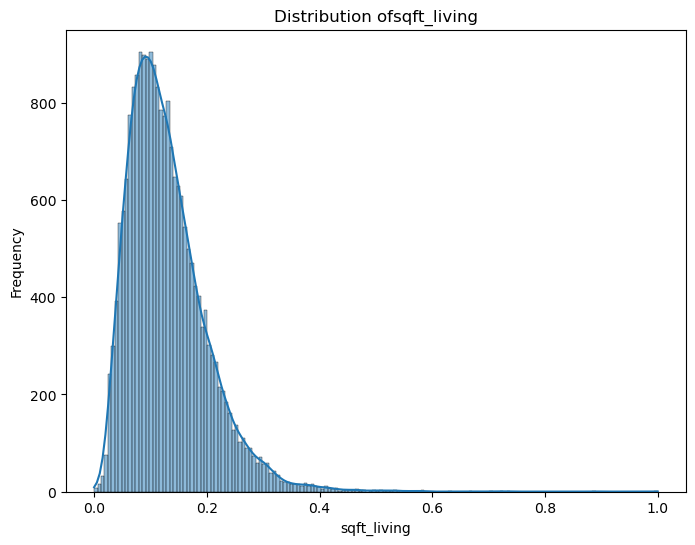

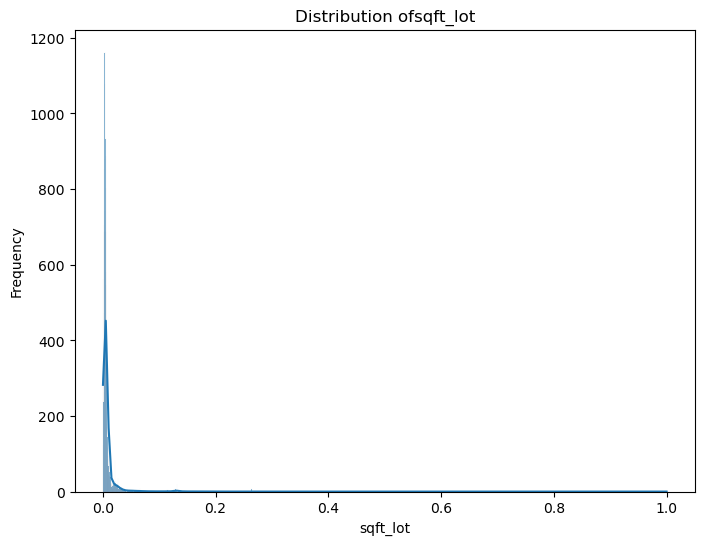

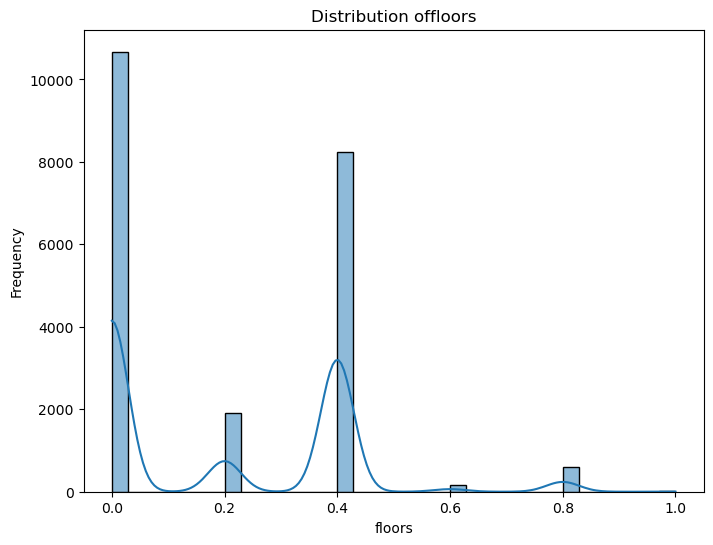

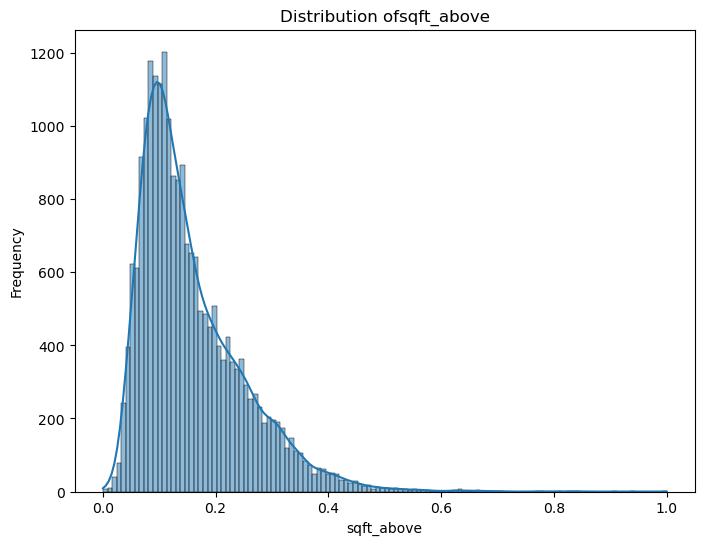

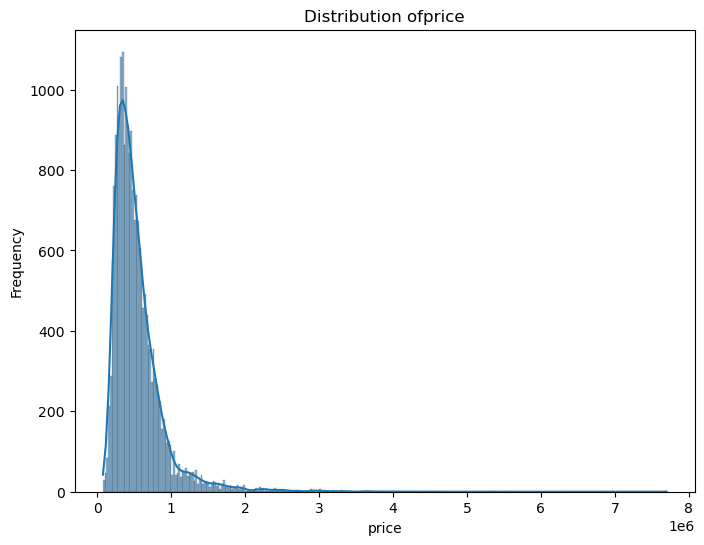

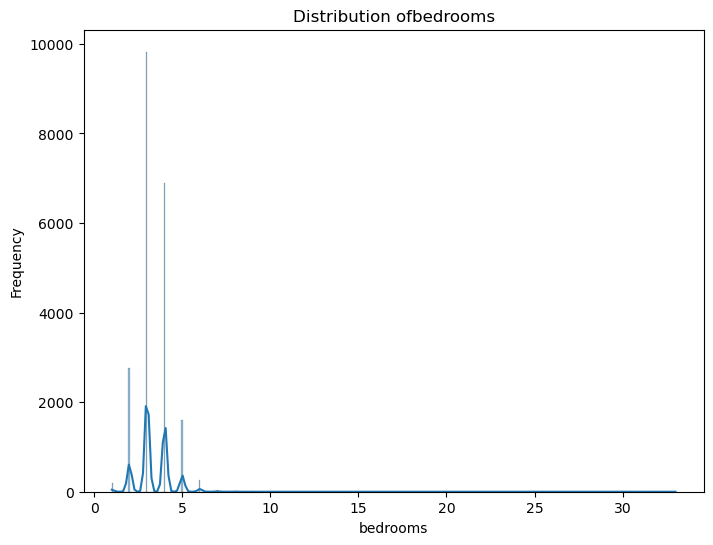

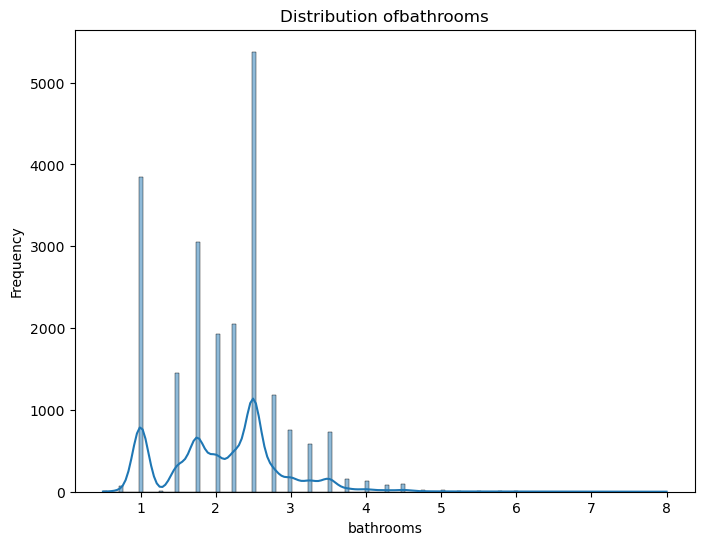

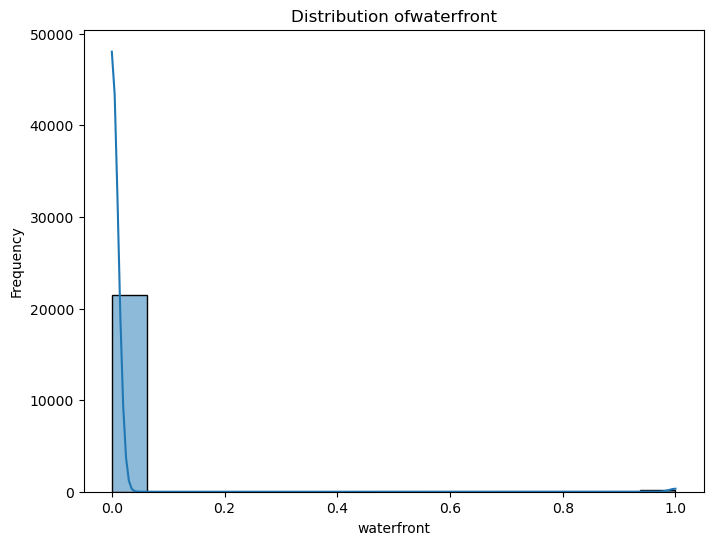

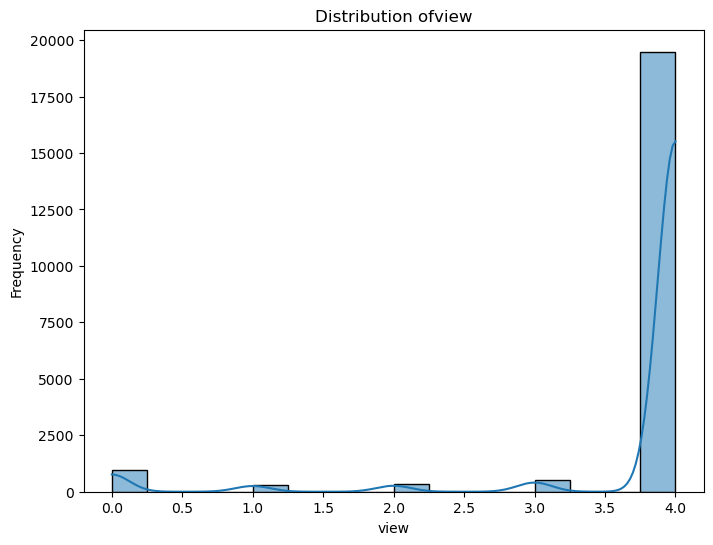

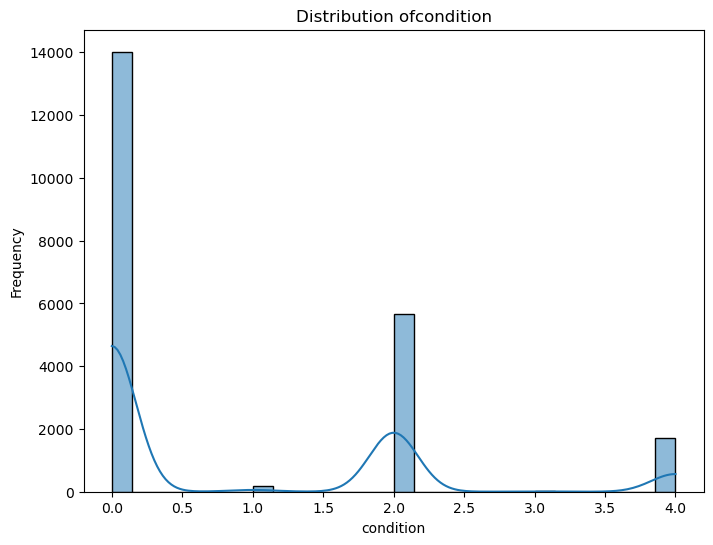

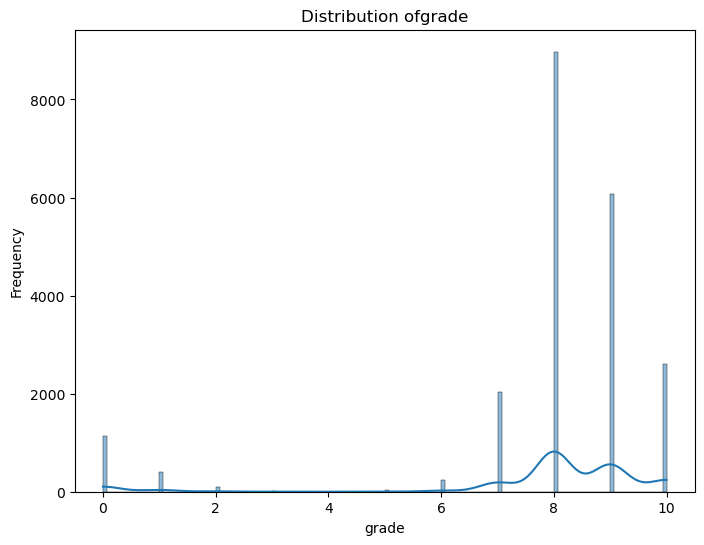

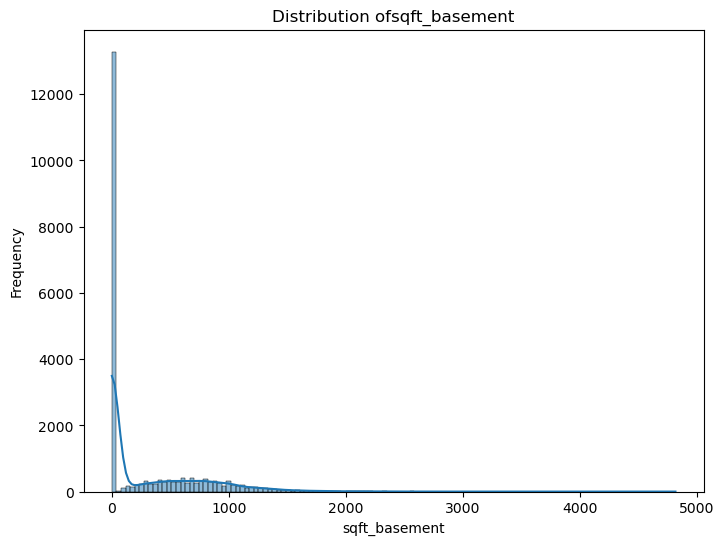

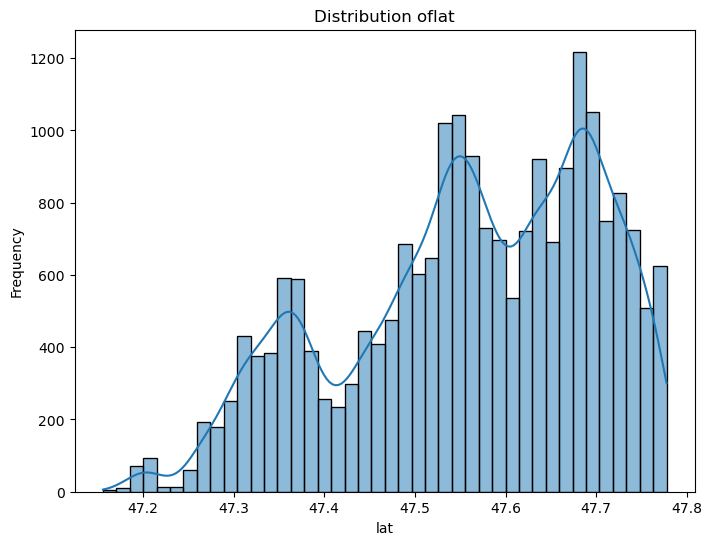

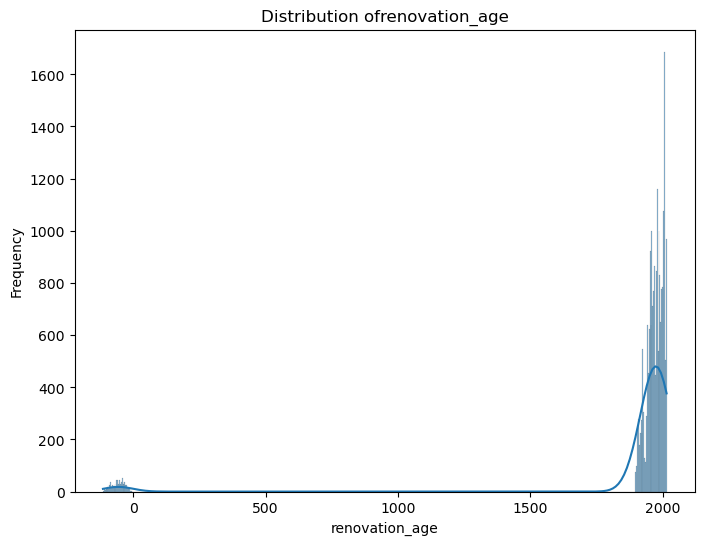

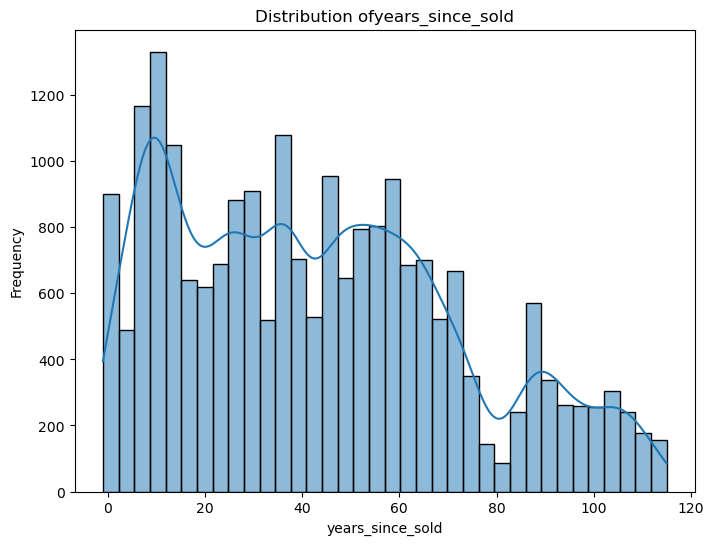

In [119]:
#select the independent variables
independent_vars = ['sqft_living', 'sqft_lot','floors','sqft_above','price','bedrooms','bathrooms','waterfront','view','condition','grade','sqft_basement','lat','renovation_age','years_since_sold']
#plot the distribution of independent variables
for var in independent_vars:
    plt.figure(figsize=(8,6))
    sns.histplot(data_scaled[var],kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Distribution of' + var)
    plt.show()

    INTERPRETATION

Looking at the histograms of the independent variables, we can make the following observations:

1. sqft_living: The distribution of square footage of living space appears to be skewed to the right, indicating that a majority of the houses have lower square footage. There is a peak around 0.1.

2. sqft_lot: The distribution of square footage of the lot also appears to be right-skewed, indicating that most houses have smaller lot sizes. The majority of the data is concentrated around the lower values.

3. floors: The number of floors seems to be mostly concentrated at values 0, 0.5, 1.0, and 2.0, with very few instances of other values. This suggests that the majority of houses have either one or two floors.

4. sqft_above: The distribution of square footage above the ground level shows a similar pattern to sqft_living, indicating a positive correlation between the two variables.

5. price: The distribution of house prices is heavily right-skewed, with a long tail to the right. This suggests that most houses have lower prices, while a few have significantly higher prices.

6. bedrooms: The distribution of the number of bedrooms appears to be relatively normally distributed, with a peak around 3 or 4 bedrooms.

7. bathrooms: The distribution of the number of bathrooms also appears to be normally distributed, with peaks around 2 or 3 bathrooms.

8. waterfront: This variable is binary, with values of 0 or 1 indicating whether a house has a waterfront view. The distribution shows that the majority of houses do not have a waterfront view.

9. view: This variable represents the level of view a house has and is also a discrete variable. The distribution shows that the majority of houses have a view level of 0.

10. condition: The distribution of the condition of the houses appears to be relatively evenly distributed, with no significant peaks or patterns.

11. grade: The distribution of the grade assigned to the houses shows a slight positive skew, with most houses having grades between 7 and 8.

12. sqft_basement: The distribution of square footage of the basement shows a large number of houses with no basement (value 0) and a smaller number with varying basement sizes.

13. lat: The latitude values show a relatively normal distribution with a peak around 47.5.

14. renovation_age: The distribution of the age of renovation appears to be right-skewed, indicating that most houses have not undergone recent renovations.

15. years_since_sold: The distribution of years since the houses were sold shows a relatively even distribution, with no significant peaks or patterns.

These visualizations provide insights into the distributions of the independent variables in the dataset and can help in understanding their characteristics and potential relationships with the target variable.


## 9.LOG TRANSFORMATIONS ON TARGET VARIABLE
To perform a log transformation on the target variable, you can apply the natural logarithm (log base e) to the 'price' column. This transformation can help to normalize the distribution of the target variable, especially if it is heavily skewed.

In [120]:
#perform log transformation on the target variable
data_scaled['price'] = np.log(data_scaled['price'])
#verify the transformed values
print(data_scaled['price'])

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price, Length: 21597, dtype: float64


In [121]:
data_scaled

,sqft_living,sqft_lot,floors,sqft_above,price,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,0.061503,0.003108,0.0,0.089602,12.309982,3,1.00,0,4,0,8,0.0,98178,47.5112,1955,59
1,0.167046,0.004072,0.4,0.199115,13.195614,3,2.25,0,4,0,8,400.0,98125,47.7210,-40,63
2,0.030372,0.005743,0.0,0.044248,12.100712,2,1.00,0,4,0,7,0.0,98028,47.7379,1933,82
3,0.120729,0.002714,0.0,0.075221,13.311329,4,3.00,0,4,4,8,910.0,98136,47.5208,1965,49
4,0.099468,0.004579,0.0,0.144912,13.142166,3,2.00,0,4,0,9,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.088079,0.000370,0.8,0.128319,12.793859,3,2.50,0,4,0,9,0.0,98103,47.6993,2009,5
21593,0.147304,0.003206,0.4,0.214602,12.899220,4,2.50,0,4,0,9,0.0,98146,47.5107,2014,1
21594,0.049355,0.000503,0.4,0.071903,12.904459,2,0.75,0,4,0,8,0.0,98144,47.5944,2009,5
21595,0.093394,0.001132,0.4,0.136062,12.899220,3,2.50,0,4,0,9,0.0,98027,47.5345,2004,11


    More data cleaning to ensure the data is ready for modeling

In [122]:
median_value = data_scaled['sqft_basement'][data_scaled['sqft_basement'] != '?'].median()
data_scaled['sqft_basement'] = pd.to_numeric(data_scaled['sqft_basement'].replace('?', median_value))


In [123]:
data_scaled['sqft_basement'] = pd.to_numeric(data_scaled['sqft_basement'])


In [124]:
#convert the independent variables to numeric datatypes
data_scaled['bedrooms'] = pd.to_numeric(data_scaled['bedrooms'], errors='coerce')
data_scaled['bathrooms'] = pd.to_numeric(data_scaled['bathrooms'], errors='coerce')

In [125]:
data_scaled.dtypes

sqft_living         float64
sqft_lot            float64
floors              float64
sqft_above          float64
price               float64
bedrooms              int64
bathrooms           float64
waterfront            int32
view                  int32
condition             int32
grade                 int32
sqft_basement       float64
zipcode               int64
lat                 float64
renovation_age        int64
years_since_sold      int64
dtype: object

In [126]:
data_scaled

,sqft_living,sqft_lot,floors,sqft_above,price,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,0.061503,0.003108,0.0,0.089602,12.309982,3,1.00,0,4,0,8,0.0,98178,47.5112,1955,59
1,0.167046,0.004072,0.4,0.199115,13.195614,3,2.25,0,4,0,8,400.0,98125,47.7210,-40,63
2,0.030372,0.005743,0.0,0.044248,12.100712,2,1.00,0,4,0,7,0.0,98028,47.7379,1933,82
3,0.120729,0.002714,0.0,0.075221,13.311329,4,3.00,0,4,4,8,910.0,98136,47.5208,1965,49
4,0.099468,0.004579,0.0,0.144912,13.142166,3,2.00,0,4,0,9,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.088079,0.000370,0.8,0.128319,12.793859,3,2.50,0,4,0,9,0.0,98103,47.6993,2009,5
21593,0.147304,0.003206,0.4,0.214602,12.899220,4,2.50,0,4,0,9,0.0,98146,47.5107,2014,1
21594,0.049355,0.000503,0.4,0.071903,12.904459,2,0.75,0,4,0,8,0.0,98144,47.5944,2009,5
21595,0.093394,0.001132,0.4,0.136062,12.899220,3,2.50,0,4,0,9,0.0,98027,47.5345,2004,11


In [127]:
data_scaled.dtypes

sqft_living         float64
sqft_lot            float64
floors              float64
sqft_above          float64
price               float64
bedrooms              int64
bathrooms           float64
waterfront            int32
view                  int32
condition             int32
grade                 int32
sqft_basement       float64
zipcode               int64
lat                 float64
renovation_age        int64
years_since_sold      int64
dtype: object

In [128]:
# Identify outliers using z-score
z_scores = np.abs((data_scaled - data_scaled.mean()) / data_scaled.std())
outlier_threshold = 3  # Adjust the threshold as needed
outliers = data_scaled[z_scores > outlier_threshold]
# Remove outliers from the dataset
data_scaled[z_scores <= outlier_threshold]
data_scaled


,sqft_living,sqft_lot,floors,sqft_above,price,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,0.061503,0.003108,0.0,0.089602,12.309982,3,1.00,0,4,0,8,0.0,98178,47.5112,1955,59
1,0.167046,0.004072,0.4,0.199115,13.195614,3,2.25,0,4,0,8,400.0,98125,47.7210,-40,63
2,0.030372,0.005743,0.0,0.044248,12.100712,2,1.00,0,4,0,7,0.0,98028,47.7379,1933,82
3,0.120729,0.002714,0.0,0.075221,13.311329,4,3.00,0,4,4,8,910.0,98136,47.5208,1965,49
4,0.099468,0.004579,0.0,0.144912,13.142166,3,2.00,0,4,0,9,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.088079,0.000370,0.8,0.128319,12.793859,3,2.50,0,4,0,9,0.0,98103,47.6993,2009,5
21593,0.147304,0.003206,0.4,0.214602,12.899220,4,2.50,0,4,0,9,0.0,98146,47.5107,2014,1
21594,0.049355,0.000503,0.4,0.071903,12.904459,2,0.75,0,4,0,8,0.0,98144,47.5944,2009,5
21595,0.093394,0.001132,0.4,0.136062,12.899220,3,2.50,0,4,0,9,0.0,98027,47.5345,2004,11


In [129]:
data_scaled = data.dropna()
#verify if the missing values have been removed
data_scaled.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
zipcode             0
lat                 0
renovation_age      0
years_since_sold    0
dtype: int64

In [130]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  float64
 1   bedrooms          21597 non-null  int64  
 2   bathrooms         21597 non-null  float64
 3   sqft_living       21597 non-null  int64  
 4   sqft_lot          21597 non-null  int64  
 5   floors            21597 non-null  int32  
 6   waterfront        21597 non-null  int32  
 7   view              21597 non-null  int32  
 8   condition         21597 non-null  int32  
 9   grade             21597 non-null  int32  
 10  sqft_above        21597 non-null  int64  
 11  sqft_basement     21597 non-null  float64
 12  zipcode           21597 non-null  int64  
 13  lat               21597 non-null  float64
 14  renovation_age    21597 non-null  int64  
 15  years_since_sold  21597 non-null  int64  
dtypes: float64(4), int32(5), int64(7)
memory

In [131]:
#convert sqft_basement to a numerical variable
data_scaled['sqft_basement'] = pd.to_numeric(data_scaled['sqft_basement'], errors='coerce')
data_scaled['sqft_basement'] = pd.to_numeric(data_scaled['sqft_basement'],errors='coerce')
data_scaled.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors                int32
waterfront            int32
view                  int32
condition             int32
grade                 int32
sqft_above            int64
sqft_basement       float64
zipcode               int64
lat                 float64
renovation_age        int64
years_since_sold      int64
dtype: object

In [132]:
data_scaled.corr()['price']

price               1.000000
bedrooms            0.308787
bathrooms           0.525906
sqft_living         0.701917
sqft_lot            0.089876
floors              0.256804
waterfront          0.264306
view               -0.304727
condition           0.022246
grade              -0.366458
sqft_above          0.605368
sqft_basement       0.321108
zipcode            -0.053402
lat                 0.306692
renovation_age     -0.111340
years_since_sold   -0.053890
Name: price, dtype: float64

In [133]:
data_scaled.describe

<bound method NDFrame.describe of           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650       0   
1      538000.0         3       2.25         2570      7242       2   
2      180000.0         2       1.00          770     10000       0   
3      604000.0         4       3.00         1960      5000       0   
4      510000.0         3       2.00         1680      8080       0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131       4   
21593  400000.0         4       2.50         2310      5813       2   
21594  402101.0         2       0.75         1020      1350       2   
21595  400000.0         3       2.50         1600      2388       2   
21596  325000.0         2       0.75         1020      1076       2   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
0               0     4         

# 10. MODELING

In [134]:
#calculate correlation matrix
corr_matrix=data_scaled.corr().abs()
print(corr_matrix)

                     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price             1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms          0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms         0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living       0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot          0.089876  0.032471   0.088373     0.173453  1.000000   
floors            0.256804  0.177944   0.502582     0.353953  0.004814   
waterfront        0.264306  0.002127   0.063629     0.104637  0.021459   
view              0.304727  0.067322   0.147591     0.228444  0.051036   
condition         0.022246  0.010281   0.154490     0.081177  0.000125   
grade             0.366458  0.061553   0.170167     0.316768  0.090127   
sqft_above        0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement     0.321108  0.297229   0.278485     0.428660  0.015031   
zipcode           0.053402  0.154092  

In [135]:
#get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#find features with corr> 0.95
to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
#drop highly corr features
data_scaled.drop(to_drop,axis=1, inplace=True)
data_scaled

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7040\3038245808.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,221900.0,3,1.00,1180,5650,0,0,4,0,8,1180,0.0,98178,47.5112,1955,59
1,538000.0,3,2.25,2570,7242,2,0,4,0,8,2170,400.0,98125,47.7210,-40,63
2,180000.0,2,1.00,770,10000,0,0,4,0,7,770,0.0,98028,47.7379,1933,82
3,604000.0,4,3.00,1960,5000,0,0,4,4,8,1050,910.0,98136,47.5208,1965,49
4,510000.0,3,2.00,1680,8080,0,0,4,0,9,1680,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,4,0,4,0,9,1530,0.0,98103,47.6993,2009,5
21593,400000.0,4,2.50,2310,5813,2,0,4,0,9,2310,0.0,98146,47.5107,2014,1
21594,402101.0,2,0.75,1020,1350,2,0,4,0,8,1020,0.0,98144,47.5944,2009,5
21595,400000.0,3,2.50,1600,2388,2,0,4,0,9,1600,0.0,98027,47.5345,2004,11


In [136]:
#split the data into X and y
X = data_scaled[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','renovation_age','years_since_sold']]
y = data_scaled['price']
#add a constant term to X
X = sm.add_constant(X)
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#convert 'renovation_age' column to numeric
#X_train['renovation_age'] = pd.to_numeric(X_train['renovation_age'],errors='coerce').fillna(0)
#X_test['renovation_age'] = pd.to_numeric(X_test['renovation_age'],errors='coerce').fillna(0)
#Create and fit the OLS model using the training data
model = sm.OLS(y_train, X_train)
results = model.fit()

#Evaluate the model on the testing data
y_pred = results.predict(X_test)

#Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2285.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:21:10   Log-Likelihood:            -2.3653e+05
No. Observations:               17277   AIC:                         4.731e+05
Df Residuals:                   17261   BIC:                         4.732e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.165e+06   3.35e+06  

   INTERPRETATION

1. R-squared and Adj. R-squared: R-squared measures the proportion of the variance in the dependent variable (price) explained by the independent variables in the model. In this case, the R-squared value is 0.665, indicating that approximately 66.5% of the variance in the price can be explained by the predictors included in the model. The Adj. R-squared adjusts for the number of predictors in the model and is slightly lower at 0.708.

2. Coefficients: The coefficients represent the estimated effects of the independent variables on the dependent variable (price). Each coefficient is associated with a specific predictor and indicates how a one-unit change in that predictor affects the price, all other variables being held constant.

   - For example, the coefficient for the "bedrooms" variable is -4.664e+04. This suggests that, holding other variables constant, each additional bedroom is associated with a decrease in the price by approximately $46,640. 

3. P-values: The P-values associated with each coefficient indicate the statistical significance of the corresponding predictor. A P-value less than a predefined significance level (e.g., 0.05) suggests that the predictor has a significant impact on the dependent variable. In this model, most predictors have P-values less than 0.05, indicating their statistical significance.

4. Confidence Intervals:The confidence intervals ([0.025, 0.975]) provide a range within which we can be confident that the true population coefficient lies. For example, the confidence interval for the "bedrooms" variable is [-5.12e+04, -4.21e+04]. This means that we can be 95% confident that the true coefficient for "bedrooms" falls within this range.




The given regression model is statistically significant. This is indicated by the following information from the OLS regression results:

- The F-statistic value is 2285, and the associated p-value is 0.00 (Prob (F-statistic)). The F-statistic tests the overall significance of the model by comparing the variability explained by the model to the variability not explained. In this case, the very low p-value suggests that the model as a whole is statistically significant.

- Additionally, the individual coefficients of the predictor variables have corresponding t-values and p-values. These values indicate the statistical significance of each predictor variable's contribution to the model. 

-Therefore, based on the F-statistic and the p-values of the coefficients, we can conclude that this regression model is statistically significant in predicting the house price.

-bedrooms:For each additional bedroom, we expect the price to decrease by approximately $46,640, holding all other variables constant.

bathrooms: For each additional bathroom, we expect the price to increase by approximately $58,410, holding all other variables constant.

sqft_living: For each additional square foot of living space, we expect the price to increase by approximately $166.31, holding all other variables constant.

sqft_lot: For each additional square foot of lot area, we expect the price to decrease by approximately $0.26, holding all other variables constant.

floors: For each additional floor, we expect the price to increase by approximately $19,240, holding all other variables constant.

waterfront: If the property has a waterfront view, we expect the price to increase by approximately $691,700, holding all other variables constant.

view: For each increase in the view rating, we expect the price to decrease by approximately $39,030, holding all other variables constant.

condition: For each increase in the condition rating, we expect the price to increase by approximately $16,440, holding all other variables constant.

grade: For each increase in the grade rating, we expect the price to decrease by approximately $20,300, holding all other variables constant.

sqft_above: For each additional square foot of above-ground living space, we expect the price to increase by approximately $87.48, holding all other variables constant.

These interpretations assume that the other variables in the model are held constant.It's important to note that these interpretations are based solely on the coefficients and their statistical significance.

In [137]:

#calculate R2 score
r2 = r2_score(y_test, y_pred)
#calculate MSE
mse = mean_squared_error(y_test,y_pred)
#calculate RMSE
rmse = np.sqrt(mse)

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print('Root Mean Squared Error:', rmse)

R2 score: 0.6649775168491072
Mean Squared Error: 43625381510.264725
Root Mean Squared Error: 208866.89902965652


# 11.VISUALIZE THE MODEL

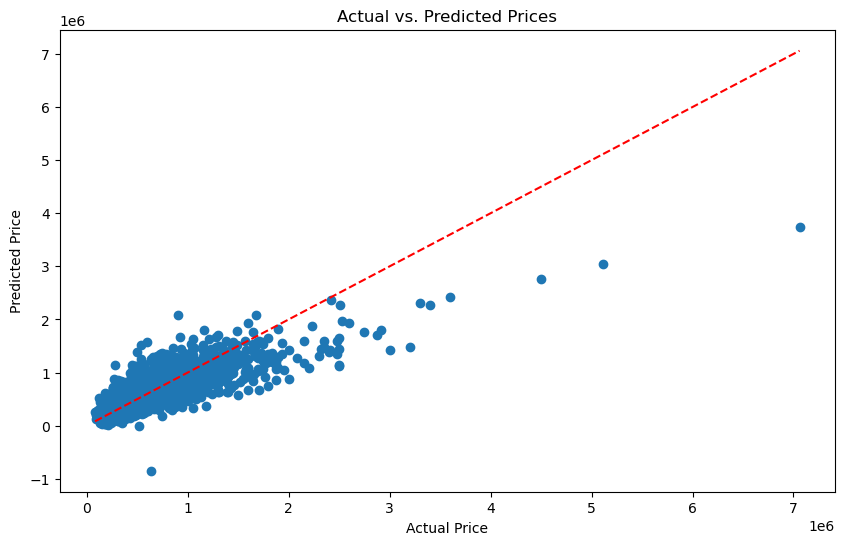

In [138]:
# Plotting predicted prices vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

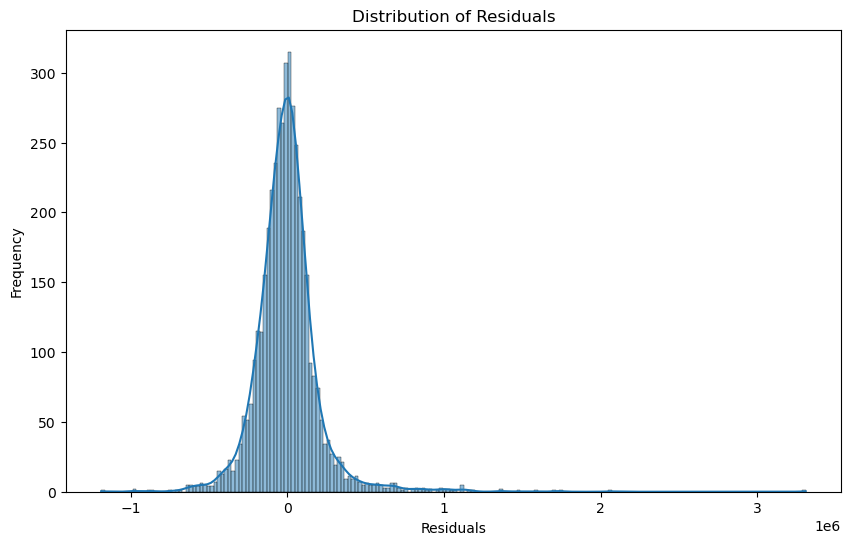

In [139]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

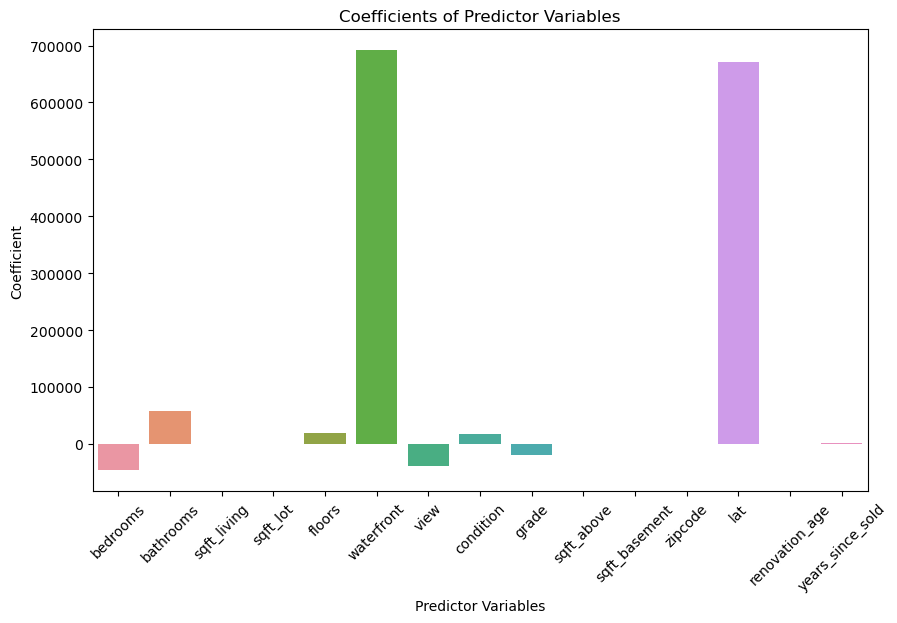

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train.columns[1:], y=results.params[1:])
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients of Predictor Variables')
plt.xticks(rotation=45)
plt.show()

## 12. CONCLUSION

1.The model has a statistically significant relationship with the target variable (price), as indicated by the overall model's F-statistic and individual predictor variable p-values.

2.The model explains approximately 66.5% of the variance in the target variable (R-squared value), suggesting that the selected predictor variables collectively have a moderate level of predictive power for determining house prices.

3.The coefficients of the predictor variables provide insights into their individual impacts on house prices. Some variables, such as the number of bedrooms, bathrooms, and square footage of living space, show expected relationships with the price, while others, such as the presence of a waterfront view or the property's condition and grade, have unique impacts on the price.

## 13.RECOMMENDATIONS


1.Consider the number of bedrooms, bathrooms, and square footage of living space as key factors when determining house prices. Properties with more bedrooms and bathrooms, as well as larger living spaces, tend to command higher prices.

2.Pay attention to the presence of a waterfront view, as it significantly affects house prices. Properties with waterfront views tend to have higher values, indicating their desirability and potential for premium pricing.

3.Evaluate the condition and grade of the property. Both factors can influence the price, with better-conditioned properties and higher-grade ratings generally correlating with higher prices. Ensuring that properties are well-maintained and upgraded to higher-grade levels may lead to increased market value.